In [1]:
import data
from stable_baselines3 import PPO
from stable_baselines3 import SAC
from stable_baselines3 import DDPG
import random
import numpy as np
from collections import deque
import environments
from environments import QuadraticEnvND
from IPython.display import clear_output
import torch
import matplotlib.pyplot as plt
import testing

In [3]:
training_functions = data.generate_dataset(n = 100, function_type = 'quadratic_function_nd', n_dims = 2)
testing_functions = data.generate_dataset(n = 10, function_type = 'quadratic_function_nd', n_dims = 2)

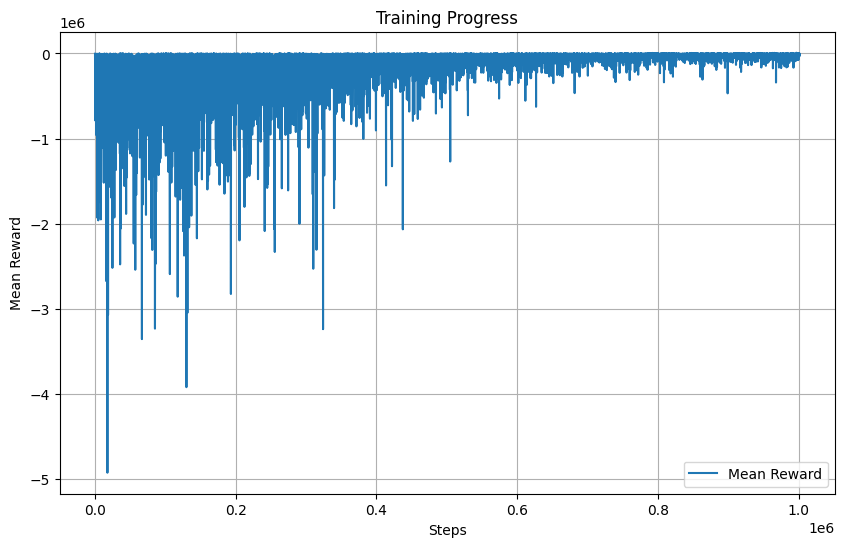

In [ ]:
env = QuadraticEnvND(functions = training_functions, n_dims = 2, max_steps = 200, reward_type = 1)
model_ppo = PPO("MlpPolicy", env, verbose=0, learning_rate=1e-4, device = "cuda:2")
callback = environments.JupyterNotebookPlotCallback()
model_ppo.learn(total_timesteps=1e6, callback=callback)
model_ppo.save("reward1_Quadratic_Function")

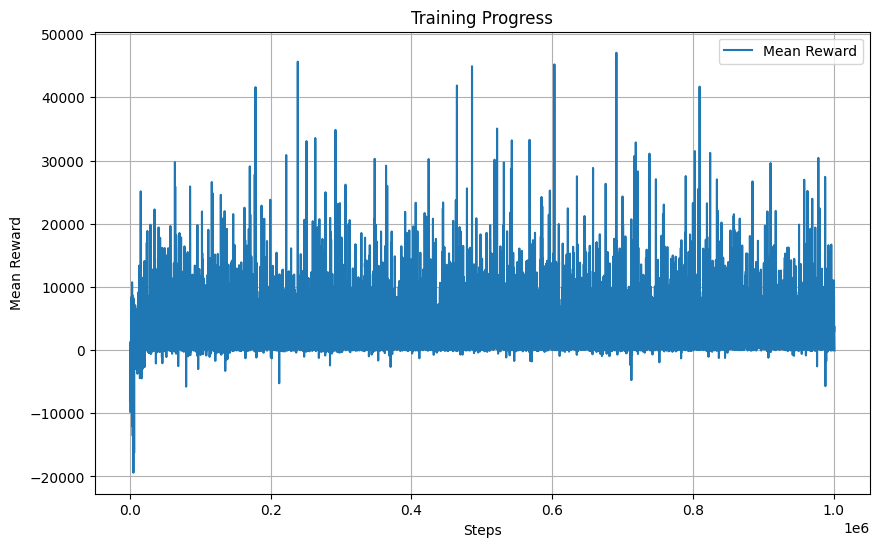

In [ ]:
env = QuadraticEnvND(functions = training_functions, n_dims = 2, max_steps = 200, reward_type = 2)
model_ppo2 = PPO("MlpPolicy", env, verbose=0, learning_rate=1e-4, device = "cuda:2")
callback = environments.JupyterNotebookPlotCallback()
model_ppo2.learn(total_timesteps=1e6, callback=callback)
model_ppo2.save("reward2_Quadratic_Function")

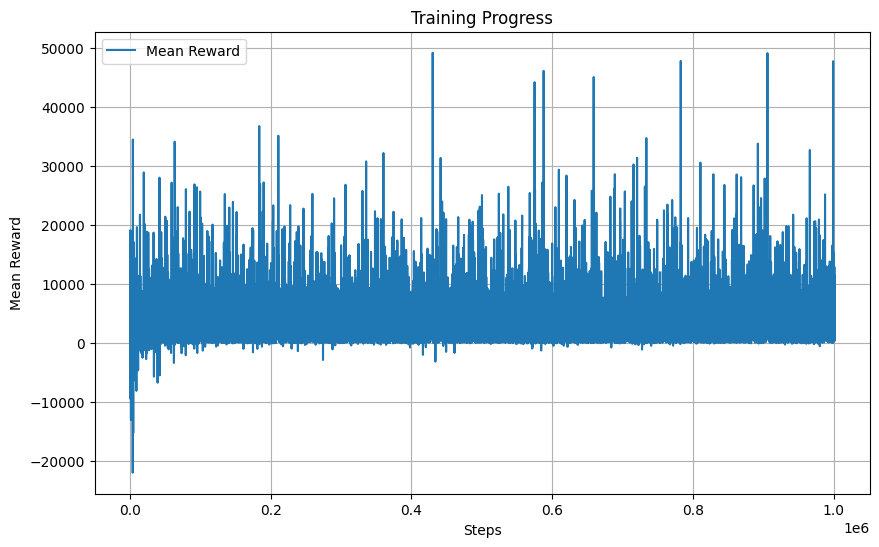

In [ ]:
env = QuadraticEnvND(functions = training_functions, n_dims = 2, max_steps = 200, reward_type = 2)
model_ppo3 = PPO("MlpPolicy", env, verbose=0, learning_rate=1e-4, device = "cuda:2")
callback = environments.JupyterNotebookPlotCallback()
model_ppo3.learn(total_timesteps=1e6, callback=callback)
model_ppo3.save("reward3_Quadratic_Function")

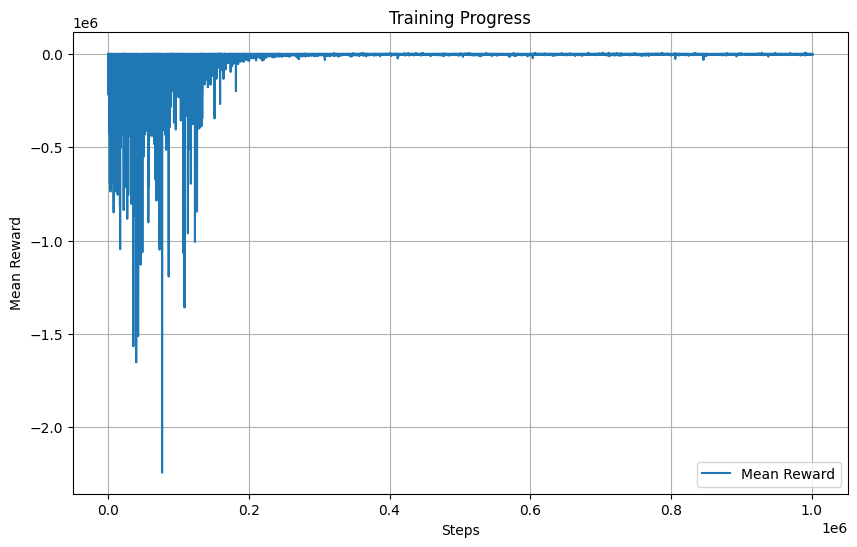

In [ ]:
env = QuadraticEnvND(functions = training_functions, n_dims = 2, max_steps = 200, reward_type = 4)
model_ppo4 = PPO("MlpPolicy", env, verbose=0, learning_rate=1e-4, device = "cuda:2")
callback = environments.JupyterNotebookPlotCallback()
model_ppo4.learn(total_timesteps=1e6, callback=callback)
model_ppo4.save("reward4_Quadratic_Function")

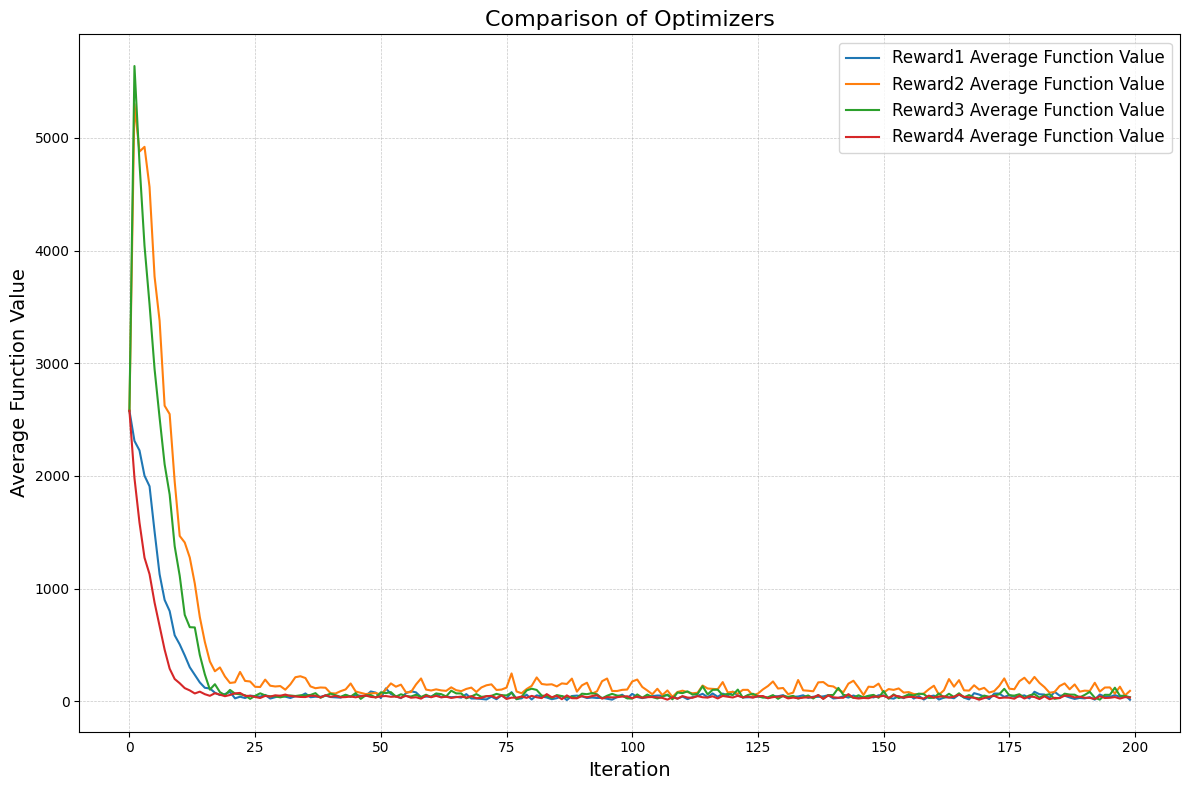

In [13]:
models = {
        'Reward1': model_ppo,
        'Reward2': model_ppo2,
        'Reward3': model_ppo3,
        'Reward4': model_ppo4,
}
max_iterations = 200
results = testing.run_optimizer_tests(env, testing_functions, models, max_iterations = 200, function_type = 'quadratic_function_nd')
avg_values = testing.calculate_average_values(results)
testing.plot_results(avg_values, max_iterations)